In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from statsmodels.discrete.discrete_model import Logit 
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from  sklearn.metrics import recall_score
from scipy import stats
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import  roc_curve
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import  roc_curve,accuracy_score
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble import  GradientBoostingClassifier

In [54]:
data=pd.read_csv("final2.csv")
data.drop(columns=data.columns[data.isna().any()].tolist(),inplace=True)
data.drop(columns=['id_val','date'],inplace=True)
data['model']=data["brand"]+"_"+data["model"]
data.drop(columns="brand",inplace=True)

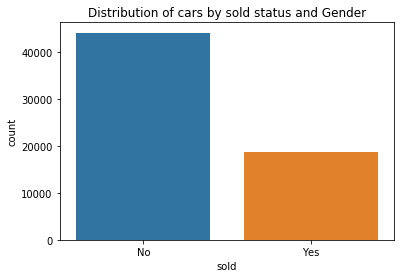

No     70.331775
Yes    29.668225
Name: sold, dtype: float64


In [55]:
sns.countplot(x="sold",data=data)
plt.title("Distribution of cars by sold status and Gender")
plt.show()
#let's see percenatage of customers who didn't subscribe to term deposit,
#and percenatage of customers who subscribed to term deposit
print(data.sold.value_counts()/len(data)*100)

#### <p1>as we see our benchmark is about 84 percent our model should predict more precisely</p1>

df_num=data.select_dtypes(exclude="object")## we divide data in this groups to check variance, 
df_object=data.select_dtypes(include="object")

In [56]:
### lets create dummies from object variables and final data
df_dummies=pd.get_dummies(df_object,prefix=df_object.columns,drop_first=True)
data1=df_num.join(df_dummies)
Y1=data1.sold_Yes
X1=data1.drop("sold_Yes",axis=1)
grid1=GridSearchCV(LogisticRegression(solver='liblinear',random_state=42,class_weight="balanced"),param_grid={"C":np.linspace(0.0001,1,20),"penalty":
                                                                                                ["l1","l2"]},scoring="roc_auc",cv=5,n_jobs=-1)
import pickle

with open("test.txt", "wb") as fp:   #Pickling
    pickle.dump(X1.columns, fp)

In [57]:
grid1.fit(X1,Y1)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': array([1.00000e-04, 5.27263e-02, 1.05353e-01, 1.57979e-01, 2.10605e-01,
       2.63232e-01, 3.15858e-01, 3.68484e-01, 4.21111e-01, 4.73737e-01,
       5.26363e-01, 5.78989e-01, 6.31616e-01, 6.84242e-01, 7.36868e-01,
       7.89495e-01, 8.42121e-01, 8.94747e-01, 9.47374e-01, 1.00000e+00]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [58]:
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.2,random_state=42,stratify=Y1)
params=list(grid1.best_params_.values())
C,Penalty=params

logit1=LogisticRegression(solver='liblinear',random_state=42,C=C,penalty=Penalty,class_weight='balanced').fit(x_train,y_train)
train_score=grid1.score(x_train,y_train)
test_score=grid1.score(x_test,y_test)
print(grid1.best_params_)
print("Train score is %s and Test score is%s"%(train_score,test_score))
#print("cross_validation score is %s"% (np.mean(cross_val_score(LogisticRegression(random_state=42,C=C,penalty=Penalty,class_weight='balanced',solver='liblinear'),X1,Y1,cv=5))))
y_pred=logit1.predict(x_test)
y_pred2=logit1.predict(x_train)
print(classification_report(y_test,grid1.predict(x_test)))
print("roc_auc: for test is",roc_auc_score(y_test,y_pred))
print("roc_auc: for train is",roc_auc_score(y_train,y_pred2))
print("average Roc_score is",grid1.best_score_)
print("recall for train",recall_score(y_train,y_pred2))
print("recall for test",recall_score(y_test,y_pred))
print("Overall Accuracy score is ",accuracy_score(y_test,y_pred))

{'C': 0.4211105263157895, 'penalty': 'l1'}
Train score is 0.6405089501947434 and Test score is0.6473656998788986
              precision    recall  f1-score   support

           0       0.80      0.55      0.65      8815
           1       0.39      0.67      0.49      3718

   micro avg       0.59      0.59      0.59     12533
   macro avg       0.59      0.61      0.57     12533
weighted avg       0.68      0.59      0.61     12533

roc_auc: for test is 0.6039828316018376
roc_auc: for train is 0.6043408107772982
average Roc_score is 0.629825266537286
recall for train 0.6593155382236267
recall for test 0.657880580957504
Overall Accuracy score is  0.5820633527487433


{'C': 0.4211105263157895, 'penalty': 'l1'}
Train score is 0.6405089501947434 and Test score is0.6473656998788986


<strong> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;CLASSIFICATION REPORT</strong>

              precision    recall  f1-score   support

           0       0.80      0.55      0.65      8815
           1       0.39      0.67      0.49      3718

   micro avg       0.59      0.59      0.59     12533
   macro avg       0.59      0.61      0.57     12533
weighted avg       0.68      0.59      0.61     12533

Overall Accuracy score is  0.5820633527487433


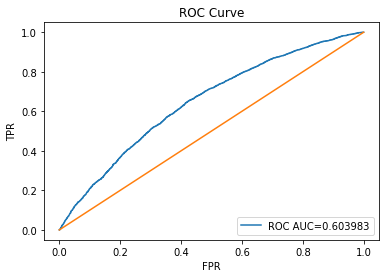

In [59]:
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.2,random_state=42,stratify=Y1)
params=list(grid1.best_params_.values())
C,Penalty=params

logit1=LogisticRegression(solver='liblinear',random_state=42,C=C,penalty=Penalty,class_weight='balanced').fit(x_train,y_train)
train_score=grid1.score(x_train,y_train)
test_score=grid1.score(x_test,y_test)
print(grid1.best_params_)
print("Train score is %s and Test score is%s"%(train_score,test_score))
#print("cross_validation score is %s"% (np.mean(cross_val_score(LogisticRegression(random_state=42,C=C,penalty=Penalty,class_weight='balanced',solver='liblinear'),X1,Y1,cv=5))))
y_pred=logit1.predict(x_test)
y_pred2=logit1.predict(x_train)
display(Markdown("<strong> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;CLASSIFICATION REPORT</strong>" ))

print(classification_report(y_test,grid1.predict(x_test)))

print("Overall Accuracy score is ",accuracy_score(y_test,y_pred))
#ROC curve
FPR,TPR,tresholds=roc_curve(y_test,grid1.predict_proba(x_test)[:,1])
plt.plot(FPR,TPR,label="ROC AUC=%f"%roc_auc_score(y_test,y_pred))
plt.title("ROC Curve")
plt.plot([0,1],[0,1])
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

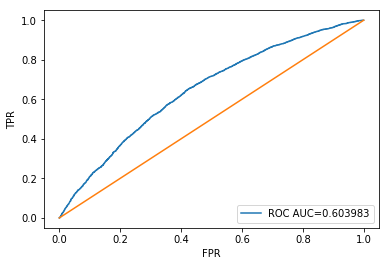

In [60]:
#ROC curve
FPR,TPR,tresholds=roc_curve(y_test,grid1.predict_proba(x_test)[:,1])
plt.plot(FPR,TPR,label="ROC AUC=%f"%roc_auc_score(y_test,y_pred))
plt.plot([0,1],[0,1])
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [28]:
from joblib import dump, load
dump(grid1, 'logit.joblib') 
clf = load('logit.joblib')

In [29]:
import pickle
with open('mylist', 'wb') as f:
    pickle.dump(X1.columns, f)

In [30]:
with open("mylist", "rb") as fp:   # Unpickling
    b = pickle.load(fp)

In [64]:
def predict(new):
    from joblib import dump, load
    clf = load('logit.joblib')
    import pickle
    with open("mylist", "rb") as fp:   # Unpickling
        b = pickle.load(fp)
    #new=data[:1]
    #new.drop(columns="sold",inplace=True)
    df_num=new.select_dtypes(exclude="object")## we divide data in this groups to check variance, 
    df_object=new.select_dtypes(include="object")
    #print(df_object)
    ## lets create dummies from object variables and final data
    df_dummies=pd.get_dummies(df_object,prefix=df_object.columns,drop_first=False)
    new=df_num.join(df_dummies)
    for i in b:
        if i not in new.columns:
            new[i]=0
    for i in new.columns:
        if i not in b:
            del new[i]
    class_,probability= clf.predict(new)[0],clf.predict_proba(new)[0][1]
    if class_==0:
        class_="unsold"
    else:
        class_="sold"
    
    print("The probability of the car to be sold is {}, so it is predicted as {} ".format(probability,class_) )
    return class_,probability
   

In [8]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))


printmd("**bold text**")

**bold text**

In [14]:
printmd(           "**bold text**")

**bold text**

In [49]:
display(Markdown("<strong> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;CLASSIFICATION REPORT</strong>" ))

<strong> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;CLASSIFICATION REPORT</strong>